In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [2]:
price_data = pd.read_csv('stocks_data.csv', index_col=0)
price_data

,C_Open,C_Close,F_Open,F_Close,MCD_Open,MCD_Close,T_Open,T_Close,MSFT_Open,MSFT_Close
date,,,,,,,,,,
2009-04-23,32.90,32.00,4.43,4.490,54.75000,55.30000,26.00000,25.50000,18.92000,18.92000
2009-04-24,32.30,31.90,5.33,5.000,55.17000,54.31000,25.56000,25.16000,19.82001,20.91000
2009-04-27,30.50,30.70,5.07,5.110,53.89999,54.49001,25.20000,25.31000,20.55000,20.39999
2009-04-28,29.00,28.90,5.08,5.190,54.05000,54.53000,25.20000,25.64999,20.25000,19.92999
2009-04-29,30.60,31.20,5.32,5.450,55.09000,54.41000,25.89999,25.52000,20.11000,20.25000
...,...,...,...,...,...,...,...,...,...,...
2020-12-21,60.35,61.23,8.87,8.930,210.62000,211.67000,28.98000,29.01000,217.55000,222.59000
2020-12-22,61.10,59.26,8.98,8.790,211.20000,211.92000,29.00000,28.40000,222.69000,223.94000
2020-12-23,60.00,60.78,8.82,8.990,212.30000,212.02000,28.50000,28.75000,223.11000,221.02000


<IPython.core.display.Javascript object>


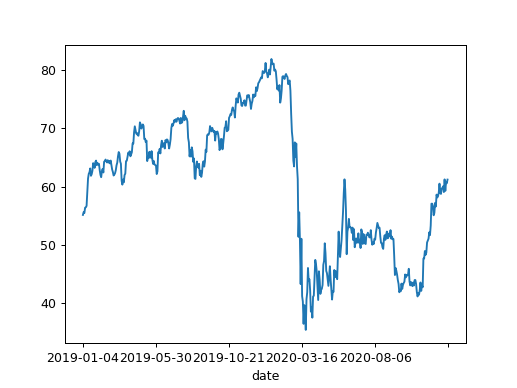

<AxesSubplot:xlabel='date'>

In [3]:
price_data['C_Close'].tail(500).plot()

In [4]:
N = 2000
assets = ['C', 'F', 'MCD', 'MSFT', 'T']

In [5]:
# compute returns
return_columns = []
for asset in assets:
    col_name = asset + '_Return'
    return_columns.append(col_name)
    price_data[col_name] = (price_data[asset + '_Close'] - price_data[asset + '_Open']) / price_data[asset + '_Open']

In [6]:
returns_data = price_data[return_columns].copy()
returns_data

,C_Return,F_Return,MCD_Return,MSFT_Return,T_Return
date,,,,,
2009-04-23,-0.027356,0.013544,0.010046,0.000000,-0.019231
2009-04-24,-0.012384,-0.061914,-0.015588,0.054994,-0.015649
2009-04-27,0.006557,0.007890,0.010947,-0.007300,0.004365
2009-04-28,-0.003448,0.021654,0.008881,-0.015803,0.017857
2009-04-29,0.019608,0.024436,-0.012343,0.006962,-0.014671
...,...,...,...,...,...
2020-12-21,0.014582,0.006764,0.004985,0.023167,0.001035
2020-12-22,-0.030115,-0.021158,0.003409,0.005613,-0.020690
2020-12-23,0.013000,0.019274,-0.001319,-0.009368,0.008772


In [30]:
N = len(returns_data)
n = 0

W_init = 100000
# p = np.ones(len(assets)) * 1.0 / len(assets) # equal weight in each stock

p = np.array([0.20, 0.20, -0.20, -0.20, 0.100])
leverage = 1.0
# print(p)
W_t_minus = []
W_t_plus = []

W_t_minus.append(W_init) # initial wealth

for i, row in returns_data.iterrows():
    if n >= N:
        break
    
    time_to_go = 1 - n/N
    wealth_fraction = W_t_minus[n] / W_init
    print('State vector: {} {}'.format(time_to_go, wealth_fraction))
    
    W_t_plus_val = W_t_minus[n] + 0 # add q(t_n) later
    W_t_plus.append(W_t_plus_val) # W_t_plus[n] now is available, this is what we can invest
    #     print('W_t_plus[{}] = {}'.format(n, W_t_plus[n]))

    # compute return
    R = np.dot(leverage * p, row.to_numpy())
    
    today_pnl = R * W_t_plus[n]
    if today_pnl > 0:
        leverage = min(3.0, leverage * 1.2)
    else:
        leverage = max(0.1, leverage * 0.8)
    print('n={} Date: {} Leverage: {} Return: {:.2f}% PnL: {:.2f}'.format(n, i, leverage, R*100, today_pnl))
    
    W_t_minus.append(W_t_plus[n] + today_pnl)
    print('Current wealth: {}'.format(W_t_minus[n+1]))

    ###############################
    n += 1
    

State vector: 1.0 1.0
n=0 Date: 2009-04-23 Leverage: 0.8 Return: -0.67% PnL: -669.45
Current wealth: 99330.54696485092
State vector: 0.9996600951733514 0.9933054696485092
n=1 Date: 2009-04-24 Leverage: 0.6400000000000001 Return: -1.94% PnL: -1931.44
Current wealth: 97399.10717625212
State vector: 0.9993201903467029 0.9739910717625212
n=2 Date: 2009-04-27 Leverage: 0.7680000000000001 Return: 0.17% PnL: 161.86
Current wealth: 97560.96298696665
State vector: 0.9989802855200544 0.9756096298696665
n=3 Date: 2009-04-28 Leverage: 0.9216000000000001 Return: 0.52% PnL: 510.34
Current wealth: 98071.30360197411
State vector: 0.9986403806934059 0.9807130360197411
n=4 Date: 2009-04-29 Leverage: 1.10592 Return: 0.78% PnL: 760.84
Current wealth: 98832.14258140603
State vector: 0.9983004758667573 0.9883214258140604
n=5 Date: 2009-04-30 Leverage: 1.327104 Return: 1.01% PnL: 998.21
Current wealth: 99830.35255142913
State vector: 0.9979605710401088 0.9983035255142912
n=6 Date: 2009-05-01 Leverage: 1.0616

n=658 Date: 2011-11-30 Leverage: 0.144 Return: 0.10% PnL: 78.36
Current wealth: 80343.26359083898
State vector: 0.7760027192386132 0.8034326359083898
n=659 Date: 2011-12-01 Leverage: 0.17279999999999998 Return: 0.04% PnL: 30.22
Current wealth: 80373.48137888133
State vector: 0.7756628144119646 0.8037348137888133
n=660 Date: 2011-12-02 Leverage: 0.20735999999999996 Return: 0.16% PnL: 131.45
Current wealth: 80504.92837422463
State vector: 0.7753229095853161 0.8050492837422464
n=661 Date: 2011-12-05 Leverage: 0.24883199999999994 Return: 0.15% PnL: 124.50
Current wealth: 80629.4247344572
State vector: 0.7749830047586675 0.8062942473445721
n=662 Date: 2011-12-06 Leverage: 0.29859839999999993 Return: 0.01% PnL: 10.39
Current wealth: 80639.81441569449
State vector: 0.7746430999320191 0.8063981441569449
n=663 Date: 2011-12-07 Leverage: 0.3583180799999999 Return: 0.18% PnL: 145.76
Current wealth: 80785.57084664631
State vector: 0.7743031951053705 0.8078557084664632
n=664 Date: 2011-12-08 Levera

State vector: 0.5516655336505778 0.8688513584126063
n=1319 Date: 2014-07-21 Leverage: 0.33657152197069745 Return: 0.05% PnL: 43.12
Current wealth: 86928.25591405992
State vector: 0.5513256288239293 0.8692825591405992
n=1320 Date: 2014-07-22 Leverage: 0.26925721757655796 Return: -0.03% PnL: -22.72
Current wealth: 86905.53602531098
State vector: 0.5509857239972807 0.8690553602531098
n=1321 Date: 2014-07-23 Leverage: 0.32310866109186953 Return: 0.12% PnL: 106.91
Current wealth: 87012.44240059589
State vector: 0.5506458191706323 0.8701244240059589
n=1322 Date: 2014-07-24 Leverage: 0.38773039331024345 Return: 0.01% PnL: 11.91
Current wealth: 87024.35012753955
State vector: 0.5503059143439837 0.8702435012753955
n=1323 Date: 2014-07-25 Leverage: 0.3101843146481948 Return: -0.16% PnL: -139.89
Current wealth: 86884.46279289904
State vector: 0.5499660095173351 0.8688446279289904
n=1324 Date: 2014-07-28 Leverage: 0.37222117757783374 Return: 0.02% PnL: 18.31
Current wealth: 86902.76901427288
State

State vector: 0.3667573079537729 0.828117390398235
n=1863 Date: 2016-09-15 Leverage: 0.32841150823686893 Return: -0.14% PnL: -113.79
Current wealth: 82697.94756224482
State vector: 0.36641740312712445 0.8269794756224482
n=1864 Date: 2016-09-16 Leverage: 0.3940938098842427 Return: 0.06% PnL: 50.07
Current wealth: 82748.01972938824
State vector: 0.36607749830047587 0.8274801972938823
n=1865 Date: 2016-09-19 Leverage: 0.4729125718610912 Return: 0.06% PnL: 52.70
Current wealth: 82800.71556857078
State vector: 0.3657375934738273 0.8280071556857078
n=1866 Date: 2016-09-20 Leverage: 0.378330057488873 Return: -0.17% PnL: -136.71
Current wealth: 82664.0095079163
State vector: 0.3653976886471788 0.826640095079163
n=1867 Date: 2016-09-21 Leverage: 0.3026640459910984 Return: -0.02% PnL: -18.34
Current wealth: 82645.66915588768
State vector: 0.3650577838205302 0.8264566915588768
n=1868 Date: 2016-09-22 Leverage: 0.3631968551893181 Return: 0.06% PnL: 53.12
Current wealth: 82698.78944975285
State vec

n=2491 Date: 2019-03-18 Leverage: 0.144 Return: 0.06% PnL: 50.52
Current wealth: 80812.55827992295
State vector: 0.15295717199184233 0.8081255827992294
n=2492 Date: 2019-03-19 Leverage: 0.17279999999999998 Return: 0.01% PnL: 8.78
Current wealth: 80821.34226008247
State vector: 0.15261726716519375 0.8082134226008247
n=2493 Date: 2019-03-20 Leverage: 0.13824 Return: -0.15% PnL: -123.60
Current wealth: 80697.74271787924
State vector: 0.15227736233854516 0.8069774271787924
n=2494 Date: 2019-03-21 Leverage: 0.11059200000000001 Return: -0.00% PnL: -1.48
Current wealth: 80696.2647223253
State vector: 0.1519374575118967 0.8069626472232531
n=2495 Date: 2019-03-22 Leverage: 0.1 Return: -0.06% PnL: -44.84
Current wealth: 80651.42051862189
State vector: 0.1515975526852481 0.8065142051862189
n=2496 Date: 2019-03-25 Leverage: 0.1 Return: -0.06% PnL: -45.81
Current wealth: 80605.61473401419
State vector: 0.15125764785859963 0.8060561473401419
n=2497 Date: 2019-03-26 Leverage: 0.12 Return: 0.08% PnL: 

<IPython.core.display.Javascript object>


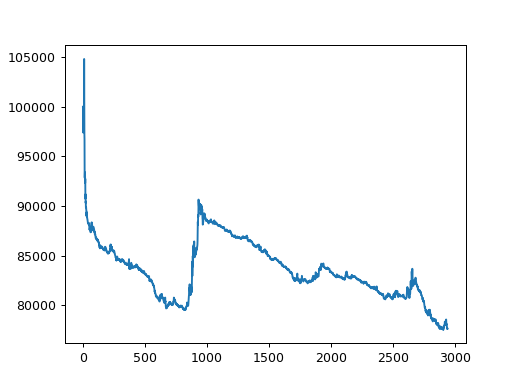

In [31]:
plt.figure()
plt.plot(W_t_minus)

<IPython.core.display.Javascript object>


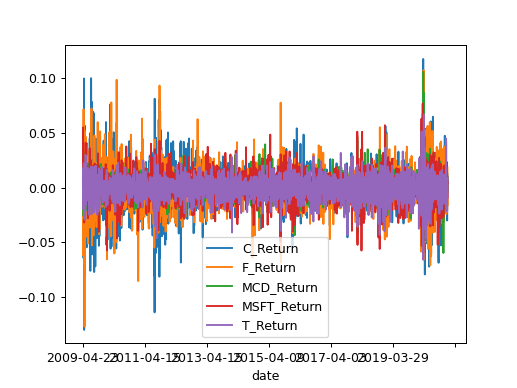

<AxesSubplot:xlabel='date'>

In [21]:
returns_data.plot()

In [10]:
for col in returns_data.columns:
    print(col, 'Mean: {:.4f}'.format(returns_data[col].mean()), 'Std.Dev: {:.4f}'.format(returns_data[col].std()))

C_Return Mean: -0.0008 Std.Dev: 0.0182
F_Return Mean: -0.0009 Std.Dev: 0.0165
MCD_Return Mean: 0.0003 Std.Dev: 0.0093
MSFT_Return Mean: 0.0005 Std.Dev: 0.0121
T_Return Mean: -0.0002 Std.Dev: 0.0097


## Construct sample paths 

In [ ]:
horizon = 1000
block_size = 20
num_blocks = int(horizon / block_size)
assert num_blocks * block_size == horizon

num_sample_paths = 10000 # how many paths to generate

In [ ]:
raw_data = returns_data.to_numpy()
raw_data # this is X

In [ ]:
len(raw_data)

In [ ]:
indexes = [x for x in range(len(raw_data))]

In [ ]:
# from numpy.random import uniform

In [ ]:
import random

In [ ]:
random.choice(indexes)

In [ ]:
def sample_circular_data(t, X):
    num_samples = len(X)
    t_mod_N = t % num_samples
    return X[t_mod_N]

In [ ]:
sample_circular_data(1, raw_data) == sample_circular_data(1 + 2942, raw_data) 

In [ ]:
def sample_bootstrap_pseudo_series(j, m, b_m, i_m, X):
    assert j > 0
    assert j <= b_m
    idx = m * b_m + j
    val = sample_circular_data(i_m + j -1, X)
    return idx, val

In [ ]:
all_sample_paths = {}

for s in range(num_sample_paths):
    print('Generating path: {}'.format(s + 1))

    sample_path = np.zeros((horizon, raw_data.shape[1]))

    for m in range(num_blocks):
        i_sample = random.choice(indexes)
        for jj in range(1, block_size + 1):
            index, Y_star = sample_bootstrap_pseudo_series(jj, m, block_size, i_sample, raw_data)
            # print(index, Y_star)
            sample_path[index-1] = Y_star

    all_sample_paths[s] = sample_path

In [ ]:
df = pd.DataFrame(data=all_sample_paths[115], columns=['Asset ' + str(x) for x in range(1, 6)])
# df
# plt.figure()
df[['Asset 1', 'Asset 2']].plot()

In [ ]:
raw_data.shape[1]